<a href="https://colab.research.google.com/github/ashikshafi08/AICrowd_Competition_Files/blob/main/blitz_faces/AICrowd_Face_Deblurring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading and extracting the data

In [1]:

!pip install aicrowd-cli 
%load_ext aicrowd.magic
%aicrowd login

     |████████████████████████████████| 48 kB 2.5 MB/s 
     |████████████████████████████████| 214 kB 13.3 MB/s 
     |████████████████████████████████| 1.1 MB 46.4 MB/s 
     |████████████████████████████████| 170 kB 53.2 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 51 kB 5.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 22.3.0
    Uninstalling pyzmq-22.3.0:
      Successfully uninstalled pyzmq-22.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you hav

Please login here: https://api.aicrowd.com/auth/TwBLtJkQZqnPnoQ31fII4DfzH4fd1C4sV-1HFCZ0crk
API Key valid
Gitlab access token valid
Saved details successfully!


In [2]:
# Creating directories 
!rm -rf data
!mkdir data
%aicrowd ds dl -c face-de-blurring -o data

# Unzipping the data 
!unzip data/train.zip -d data/train > /dev/null
!unzip data/val.zip -d data/val > /dev/null
!unzip data/test.zip -d data/test > /dev/null

test.zip:   0%|          | 0.00/42.1M [00:00<?, ?B/s]

train.zip:   0%|          | 0.00/224M [00:00<?, ?B/s]

val.zip:   0%|          | 0.00/89.2M [00:00<?, ?B/s]

In [3]:
# Importing the needed packages for now 
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 

# Getting the image path
train_org_img =  'data/train/original/'
test_org_img =  'data/test/original/'
val_org_img =  'data/val/original/'

train_blur_img = 'data/train/blur/'
val_blur_img = 'data/val/blur/'
test_blur_img = 'data/test/blur/'

# Checking the directories 
len(os.listdir(train_org_img)) , len(os.listdir(val_org_img))

(5000, 2000)

In [4]:
# Getting the filepaths for both blur and original image 
import matplotlib.image as mpimg


blur_img_paths = os.listdir(train_blur_img)
'data/train/' + blur_img_paths[0]

'data/train/z0qbd.jpg'

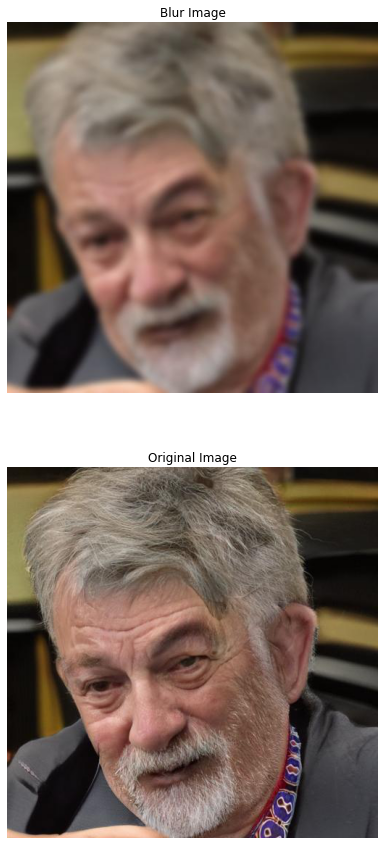

In [5]:
import random 
fig , axs = plt.subplots(2, figsize = (15 , 15))
axs = axs.ravel()

for i in range(2):
    random_path = random.choice(blur_img_paths)
    blur_full_path = 'data/train/blur/' + random_path 
    original_full_path = 'data/train/original/' + random_path

    im_blur = mpimg.imread(blur_full_path)
    im_org = mpimg.imread(original_full_path)

    axs[0].set_title('Blur Image')
    axs[0].imshow(im_blur)
    axs[0].set_axis_off()

    axs[1].set_title('Original Image')
    axs[1].set_axis_off()
    axs[1].imshow(im_org)


plt.show()


In [5]:
# Specifying the parameters 
IMAGE_SIZE = 128 
BATCH_SIZE = 4 

# Function to read an image 
 

